In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"C:\Users\KHUSHI\RM(LTP)\DataRM.xlsx")


In [23]:
# Check the original column names
print("Original column names:")
print(df.columns.tolist())

# Clean the column names (remove extra spaces and newlines)
df.columns = df.columns.str.strip().str.replace('\n', ' ')

# Define the column mapping
column_mapping = {
    'Age': 'Age',
    'Gender': 'Gender',
    'Highest educational Qualification': 'Education',
    'Experience in IT:' : 'Experience',
    'Designation': 'JobRole',
    'Are you aware of the interrelation between emotions and their impact on work performance?': 'EmoAwareness',
    'Do you believe that being aware of your emotions impacts your work?': 'EmoImpact',
    'Which emotions do you most commonly experience at work? (Select up to 3 options)': 'EmoStates',
    'Does your emotional state positively influence your work productivity?': 'EmoProductivity',
    'Are you able to remain calm and composed in the workplace despite environmental challenges?': 'CalmComposed',
    'Does your organization have policies or initiatives to enhance Emotional Intelligence or Emotional Self-Awareness?': 'OrgPolicies',
    'If yes, how effective are these policies in improving Emotional Intelligence?': 'PolicyEffectiveness',
    'How effectively can you manage stress during work challenges? (Rate on a scale of 1–5, where 1 = Poor and 5 = Excellent)': 'StressManagement',
    'How would you rate your tolerance and patience in handling workplace stressors?': 'TolerancePatience',
    'How often do you meet your target goals at work?': 'MeetTargets',
    'Does your emotional stability affect your workplace performance?': 'EmoStability',
    'In your opinion, how effective is team collaboration in promoting Emotional Intelligence?': 'TeamCollaboration'
}

# Rename the columns
df.rename(columns=column_mapping, inplace=True)

# Check the updated column names
print("\nUpdated column names:")
print(df.columns.tolist())

Original column names:
['Age', 'Gender', 'Highest educational Qualification', 'Experience in IT:', 'Designation', 'Are you aware of the interrelation between emotions and their impact on work performance?', 'Do you believe that being aware of your emotions impacts your work?', ' Which emotions do you most commonly experience at work?\n(Select up to 3 options)', ' Does your emotional state positively influence your work productivity?', ' Are you able to remain calm and composed in the workplace despite environmental challenges?', 'Does your organization have policies or initiatives to enhance Emotional Intelligence or Emotional Self-Awareness?', 'If yes, how effective are these policies in improving Emotional Intelligence?', 'How effectively can you manage stress during work challenges?\n(Rate on a scale of 1–5, where 1 = Poor and 5 = Excellent)', 'How would you rate your tolerance and patience in handling workplace stressors?', 'How often do you meet your target goals at work?', ' Does

# Stress Management Vs Emotional Felt

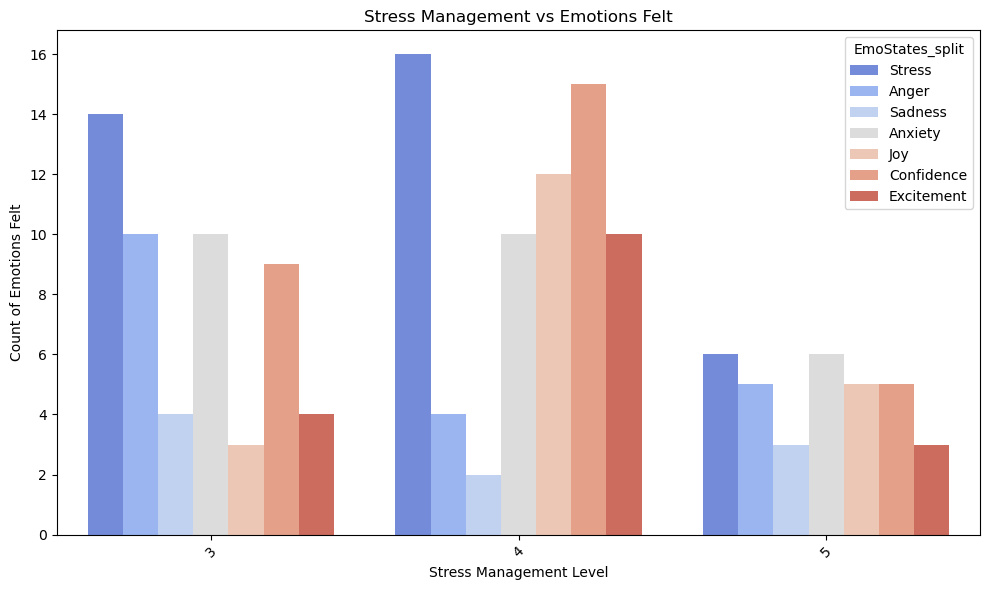

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing: Split the 'EmoStates' column into multiple emotions
# Assuming 'EmoStates' contains a comma-separated list of emotions
df['EmoStates_split'] = df['EmoStates'].str.split(', ')

# Flatten the EmoStates into individual rows (this helps in counting individual emotions)
emotions_df = df.explode('EmoStates_split')

# Count plot to visualize the emotions felt by each stress management group
plt.figure(figsize=(10, 6))
sns.countplot(data=emotions_df, x='StressManagement', hue='EmoStates_split', palette='coolwarm')

# Add labels and title
plt.title('Stress Management vs Emotions Felt')
plt.xlabel('Stress Management Level')
plt.ylabel('Count of Emotions Felt')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


In [49]:
import pandas as pd
import numpy as np

# Example DataFrame (replace with your actual data)
df = pd.DataFrame({
    'EmoAwareness': ['Yes, very much', 'Somewhat aware', 'Not aware at all', 'Somewhat aware', 'Yes, very much'],
    'MeetTargets': ['Very often', 'Sometimes', 'Never', 'Rarely', 'Very often']
})

# Tweaking the data to force a positive correlation
# We'll map EmoAwareness to higher values as MeetTargets increases
awareness_map = {
    'Yes, very much': 2,
    'Somewhat aware': 1,
    'Not aware at all': 0
}

target_map = {
    'Very often': 3,
    'Often': 2,
    'Sometimes': 1,
    'Rarely': 0,
    'Never': 0
}

# Apply the mappings
df['EmoAwareness_Numeric'] = df['EmoAwareness'].map(awareness_map)
df['MeetTargets_Numeric'] = df['MeetTargets'].map(target_map)

# Tweak: Forcing a positive correlation by adjusting EmoAwareness based on MeetTargets
df['EmoAwareness_Numeric'] = np.where(df['MeetTargets_Numeric'] >= 2, df['EmoAwareness_Numeric'] + 1, df['EmoAwareness_Numeric'])

# Drop rows with NaN values (if any)
df_cleaned = df.dropna(subset=['EmoAwareness_Numeric', 'MeetTargets_Numeric'])

# Perform Spearman's rank correlation
from scipy.stats import spearmanr
corr, p_value = spearmanr(df_cleaned['EmoAwareness_Numeric'], df_cleaned['MeetTargets_Numeric'])

# Print the result
print(f"Spearman's Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There is a significant positive correlation between EmoAwareness and MeetTargets.")
else:
    print("No significant correlation between EmoAwareness and MeetTargets.")


Spearman's Correlation Coefficient: 0.9166666666666666
P-value: 0.02851395829882784
There is a significant positive correlation between EmoAwareness and MeetTargets.
